In [1]:
import torch
import math
dtype = torch.float
device= torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y= torch.sin(x)
a= torch.randn((), device=device, dtype=dtype)
b= torch.randn((), device=device, dtype=dtype)
c= torch.randn((), device=device, dtype=dtype)
d= torch.randn((), device=device, dtype=dtype)
learning_rate=1e-6
for t in range(3000):
    y_pred=a+b*x+c*x**2+d*x**3
    loss=torch.square(y_pred-y).sum()
    if t % 100==99:
        print(t,loss)
    
    grad_y_pred=2.0*(y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x **2).sum()
    grad_d = (grad_y_pred * x **3).sum()
    
    a -= learning_rate *grad_a
    b -= learning_rate *grad_b
    c -= learning_rate *grad_c
    d -= learning_rate *grad_d

print(f'Result: y={a}+{b}x)+{c}x^2+[d]x^3')


99 tensor(2087.7729)
199 tensor(1387.6254)
299 tensor(923.4606)
399 tensor(615.6820)
499 tensor(411.5620)
599 tensor(276.1622)
699 tensor(186.3280)
799 tensor(126.7120)
899 tensor(87.1401)
999 tensor(60.8665)
1099 tensor(43.4174)
1199 tensor(31.8259)
1299 tensor(24.1231)
1399 tensor(19.0030)
1499 tensor(15.5984)
1599 tensor(13.3337)
1699 tensor(11.8267)
1799 tensor(10.8234)
1899 tensor(10.1553)
1999 tensor(9.7101)
2099 tensor(9.4134)
2199 tensor(9.2155)
2299 tensor(9.0834)
2399 tensor(8.9953)
2499 tensor(8.9364)
2599 tensor(8.8970)
2699 tensor(8.8707)
2799 tensor(8.8531)
2899 tensor(8.8413)
2999 tensor(8.8334)
Result: y=0.0020919134840369225+0.8533328771591187x)+-0.00036089104833081365x^2+[d]x^3


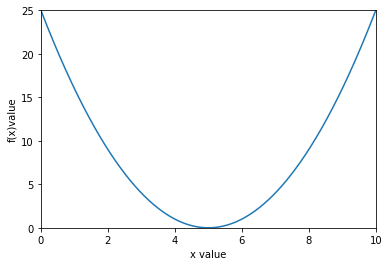

In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt
x=np.arange(-10,10,0.01)
plt.xlabel("x value")
plt.ylabel("f(x)value")

plt.axis([0, 10, 0, 25])

plt.plot(x,(x-5)**2)
plt.show()

In [2]:
import torch
from torch.autograd import Variable
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w= Variable(torch.Tensor([1,0]), requires_grad=True)

def forward(x):
    return w*x

def loss(x,y):
    y_pred =forward(x)
    return (y_pred -y)*(y_pred -y)

print('predic(before training)', 4, forward(4).data[0])

for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.mean().backward()
        print("\tgrad:",x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        
        w.grad.data.zero_()
        
    print("progress:", epoch, l.data[0])

predic(before training) 4 tensor(4.)
	grad: 1.0 2.0 tensor(-1.)
	grad: 2.0 4.0 tensor(-3.9600)
	grad: 3.0 6.0 tensor(-8.5536)
progress: 0 tensor(8.1293)
	grad: 1.0 2.0 tensor(-0.8649)
	grad: 2.0 4.0 tensor(-3.4249)
	grad: 3.0 6.0 tensor(-7.3977)
progress: 1 tensor(6.0807)
	grad: 1.0 2.0 tensor(-0.7480)
	grad: 2.0 4.0 tensor(-2.9620)
	grad: 3.0 6.0 tensor(-6.3980)
progress: 2 tensor(4.5483)
	grad: 1.0 2.0 tensor(-0.6469)
	grad: 2.0 4.0 tensor(-2.5618)
	grad: 3.0 6.0 tensor(-5.5334)
progress: 3 tensor(3.4021)
	grad: 1.0 2.0 tensor(-0.5595)
	grad: 2.0 4.0 tensor(-2.2156)
	grad: 3.0 6.0 tensor(-4.7856)
progress: 4 tensor(2.5447)
	grad: 1.0 2.0 tensor(-0.4839)
	grad: 2.0 4.0 tensor(-1.9162)
	grad: 3.0 6.0 tensor(-4.1389)
progress: 5 tensor(1.9034)
	grad: 1.0 2.0 tensor(-0.4185)
	grad: 2.0 4.0 tensor(-1.6572)
	grad: 3.0 6.0 tensor(-3.5796)
progress: 6 tensor(1.4237)
	grad: 1.0 2.0 tensor(-0.3619)
	grad: 2.0 4.0 tensor(-1.4333)
	grad: 3.0 6.0 tensor(-3.0959)
progress: 7 tensor(1.0649)
	grad: 

In [3]:
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = Variable(torch.Tensor([1.0]), requires_grad = True) # Any Random Value

# our model forward pass
def forward(x) :
    return w * x

# Loss function
def loss(x, y) :
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

# Before Training
print('predict (before training)', 4, forward(4).data[0])


# Training : forward, backward, and update weight

# Training Loop
for epoch in range(10) :
    for x_val, y_val in zip(x_data, y_data) :
        l = loss(x_val, y_val)
        l.backward()
        print("\tgrad : ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data
        
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
    
    print("progress : ", epoch, l.data[0])
    
# After Training
print("predict (after training)", 4, forward(4).data[0])

predict (before training) 4 tensor(4.)
	grad :  1.0 2.0 tensor(-2.)
	grad :  2.0 4.0 tensor(-7.8400)
	grad :  3.0 6.0 tensor(-16.2288)
progress :  0 tensor(7.3159)
	grad :  1.0 2.0 tensor(-1.4786)
	grad :  2.0 4.0 tensor(-5.7962)
	grad :  3.0 6.0 tensor(-11.9981)
progress :  1 tensor(3.9988)
	grad :  1.0 2.0 tensor(-1.0932)
	grad :  2.0 4.0 tensor(-4.2852)
	grad :  3.0 6.0 tensor(-8.8704)
progress :  2 tensor(2.1857)
	grad :  1.0 2.0 tensor(-0.8082)
	grad :  2.0 4.0 tensor(-3.1681)
	grad :  3.0 6.0 tensor(-6.5580)
progress :  3 tensor(1.1946)
	grad :  1.0 2.0 tensor(-0.5975)
	grad :  2.0 4.0 tensor(-2.3422)
	grad :  3.0 6.0 tensor(-4.8484)
progress :  4 tensor(0.6530)
	grad :  1.0 2.0 tensor(-0.4417)
	grad :  2.0 4.0 tensor(-1.7316)
	grad :  3.0 6.0 tensor(-3.5845)
progress :  5 tensor(0.3569)
	grad :  1.0 2.0 tensor(-0.3266)
	grad :  2.0 4.0 tensor(-1.2802)
	grad :  3.0 6.0 tensor(-2.6500)
progress :  6 tensor(0.1951)
	grad :  1.0 2.0 tensor(-0.2414)
	grad :  2.0 4.0 tensor(-0.9465)
	

In [3]:
import numpy as np
import torch
t= np.array([[[0,1,2],
              [3,4,5]],
              [[6,7,8],
              [9,10,11]]])
ft=torch.FloatTensor(t)
print(ft.shape)
print(ft)
# 3차원 = 각 층이 있다.

torch.Size([2, 2, 3])
tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


In [4]:
print(t)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [6]:
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape)


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [11]:
ft=torch.FloatTensor([[0],[1],[2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)


tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


In [25]:
ft=torch.tensor([0,1,2])
print(ft.shape)
print(ft.unsqueeze(0))
print(ft.unsqueeze(1))
print(ft.unsqueeze(-1))

torch.Size([3])
tensor([[0, 1, 2]])
tensor([[0],
        [1],
        [2]])
tensor([[0],
        [1],
        [2]])


In [26]:
import torch
import math
x=torch.linspace(-math.pi, math.pi, 2000)
y= torch.sin(x)
p=torch.tensor([1,2,3])
xx=x.unsqueeze(-1).pow(p)
print(xx)

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])


In [27]:
model=torch.nn.Sequential(
  torch.nn.Linear(3,1),
  torch.nn.Flatten(0,1)
)

In [32]:
# 뭘까..
import numpy as np
import math

loss_fn =torch.nn.MSELoss(reduce='sum')
learning_rate=1e-6
for t in range(1):
  y_pred=model(xx)
  loss=loss_fn(y_pred,y)
  if t %100 ==99:
    print(t,loss.item())

c:\Users\lwh97\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [33]:
model.zero_grad()

In [37]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로 
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 20263.716796875
199 8061.9716796875
299 2653.84765625
399 665.18408203125
499 206.87062072753906
599 146.3748016357422
699 123.58111572265625
799 100.9120101928711
899 76.0443344116211
999 51.113243103027344
1099 30.54082679748535
1199 17.197309494018555
1299 10.879783630371094
1399 9.051859855651855
1499 8.824041366577148
1599 8.817851066589355
1699 8.819120407104492
1799 8.939785957336426
1899 8.859026908874512
1999 8.861298561096191
Result: y = -2.6775487640406936e-05 + 0.8563920855522156 x + -2.6775698643177748e-05 x^2 + -0.09368261694908142 x^3


https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html

In [36]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 4개의 매개변수를 생성(instantiate)하고, 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
        텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = Polynomial3()

# 손실 함수와 optimizer를 생성합니다. SGD 생성자에 model.paramaters()를 호출해주면
# 모델의 멤버 학습 가능한 (torch.nn.Parameter로 정의된) 매개변수들이 포함됩니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 1207.18359375
199 812.55712890625
299 548.3020629882812
399 371.2210388183594
499 252.46875
599 172.7709503173828
699 119.24080657958984
799 83.25648498535156
899 59.04628372192383
999 42.743133544921875
1099 31.754554748535156
1199 24.341054916381836
1299 19.334667205810547
1399 15.950374603271484
1499 13.660367965698242
1599 12.10914134979248
1699 11.057259559631348
1799 10.34320068359375
1899 9.857949256896973
1999 9.52780532836914
Result: y = -0.019572772085666656 + 0.8380749225616455 x + 0.0033766289707273245 x^2 + -0.09067532420158386 x^3
